<a href="https://colab.research.google.com/github/shahparth0007/Google_Collab_Files/blob/main/ML_Data_Cleaning_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


# ***ML Data Cleaning and Feature Selection***
**Assignment 1** , Due Date 22nd September 2021 Created by: Parth Shah, NUID: 001006181

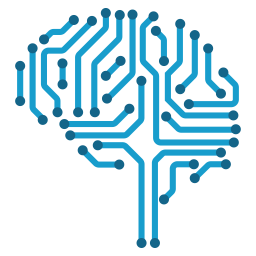
---


## ***1. Abstract***

---

An Retail Company wants to find out which of their existing customers will make a purchase in upcoming Diwali Ocassion(2017) of 1 Month Time Frame. The aim of the notebook is to find the factors affecting the this and do analysis


## ***2. Importing Libraries*** 




---



In [28]:
import pandas as pd #Pandas will help us in data manipulation and more cool stuff
import numpy as np  #A mathematical library which is not cool. to much math.
import seaborn as sns #Helps in plotting beautiful graphs and plots
import matplotlib 
import matplotlib.pyplot as plt #Helps in plotting beautiful graphs and plots
from sklearn.linear_model import LogisticRegression #Helps in building Logistic regression Model
from sklearn.tree import DecisionTreeClassifier #Helps in Building Decision Tree Model
from sklearn.model_selection import train_test_split #Helps in sampling the data into test and train with same distribution in both
import warnings
print('*** Libraries loaded ***')

*** Libraries loaded ***


## ***3. Data Loading***


---

Data Description: This is an retail company data of its existing consumer base and they want to solve for a problem where they want to know which of their customers have higher propensity of buying in Diwali 2017.

© Data has been taken from https://www.kaggle.com/parthshah0007/diwali-customer-data which is an open source data.

>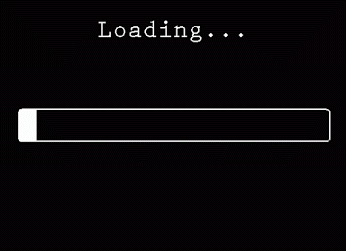



In [29]:
# We will use pandas to read the data
# from this cell we use "pd" as a shortform for pandas library, (you can give any name)
raw_data = pd.read_csv('https://raw.githubusercontent.com/shahparth0007/Datasets/main/DIWALI_2017_CUSTOMER_DATA_small.csv') 
print("*** Data Loaded ***")



*** Data Loaded ***


### ***3.1 Data Checking***

---
Basic Data Checking


In [30]:
#lets check the data with some basic functions
raw_data.head()  #head() functions gives only 5 rows of the dataframe

,New_ID,GENDER,MARITAL_STATUS,NO_OF_CHILDREN,CHILD1GENDER,CHILD2GENDER,CHILD3GENDER,LTD_OCCASION,LTD_OFFER_APPLIED,LTD_QUANTITY,LTD_AMOUNT,FTD_OCCASION,FTD_QUANTITY,FTD_OFFER_APPLIED,FTD_AMOUNT,TOTAL_TRANSACTIONS_OVERALL,CUSTOMER_LEVEL_OVERALL,ENGAGEMENT_DAYS_OVERALL,ADGBT_OVERALL,TOTAL_TRANSACTION_AMOUNT_OVERALL,TOTAL_QUANTITY_OVERALL,TOTAL_DISCOUNT_OVERALL,AVERAGE_TRANSACTION_AMOUNT_OVERALL,AVERAGE_QUANTITY_OVERALL,AVERAGE_DISCOUNT_OVERALL,TOTAL_BIRTHDAY_PRODUCT,PREMIUM_PRODUCT,TOTAL_ANNIVERSARY_PRODUCT,TOTAL_OCASSION_PRODUCT,FAV_DAY,FAV_MONTH,TIERNAME,AGE,CITY,STATE,SPOUSEAGE,RECENCY,INACTIVITY_RATIO,TENURE,ADGBT_BANDS,DOB_DAYS_LEFT,ANNIVERSARY_DAYS_LEFT,SPOUSE_DOB_DAYS_LEFT,TENURE_BANDS,DIWALI_TRANSACTIONS,DIWALI_AMOUNT,DIWALI_DISCOUNT,PAST_DIWALI_PURCHASER,RESPONDERS
0,364259,FEMALE,MARRIED,0,NaN,NaN,NaN,0,1,2,752260,0,2,1,313995,4,Medium,4,67,1218512,6,49028,304628,1,12257,0,6,2,NaN,7,7,ENCIRCLE PLATINUM,56.0,DEHRADUN,UTTARAKHAND,57.0,430,6,299,61-122,321.0,268.0,16.0,290TO537,0,0,0,0,0
1,392349,MALE,MARRIED,0,NaN,NaN,NaN,0,0,2,40927,0,2,0,112057,3,Medium,3,54,331879,8,0,110626,2,0,0,5,2,4.0,4,3,ENCIRCLE GOLD,61.0,LATUR,MAHARASHTRA,NaN,486,9,243,LT_61,332.0,355.0,NaN,LT290,0,0,0,0,0
2,49648,FEMALE,SINGLE,0,NaN,NaN,NaN,0,1,1,157926,1,9,0,110217,6,Medium,6,123,772242,33,48862,128707,5,8143,0,11,0,12.0,5,10,ENCIRCLE PLATINUM,45.0,NARSINGHPUR,DELHI,NaN,100,0,629,123-194,169.0,NaN,NaN,537TO704,2,243454,0,1,1
3,225574,FEMALE,SINGLE,0,NaN,NaN,NaN,0,1,4,67690,0,1,1,21409,2,Low,2,371,89098,5,11488,44549,2,5744,0,5,0,NaN,1,2,ENCIRCLE GOLD,50.0,DELHI,DELHI,NaN,240,0,489,GT_321,61.0,NaN,NaN,290TO537,0,0,0,0,0
4,122354,NaN,NaN,0,NaN,NaN,NaN,0,1,1,251346,1,3,1,944796,2,Low,2,212,1196141,4,217710,598070,2,108855,1,4,0,3.0,4,10,ENCIRCLE GOLD,57.0,NaN,NaN,NaN,130,0,599,195-321,2.0,NaN,NaN,537TO704,1,944796,203729,1,0


In [31]:
print("The data has",raw_data.shape[0],"rows and",raw_data.shape[1],"columns") #shape fucntions gives rows x columns value of the data
print("Data type of each column\n",raw_data.dtypes) #dtypes function helps us know the type of all the columns types so that we dont mess up.

The data has 132414 rows and 49 columns
Data type of each column
 New_ID                                  int64
GENDER                                 object
MARITAL_STATUS                         object
NO_OF_CHILDREN                          int64
CHILD1GENDER                           object
CHILD2GENDER                           object
CHILD3GENDER                           object
LTD_OCCASION                            int64
LTD_OFFER_APPLIED                       int64
LTD_QUANTITY                            int64
LTD_AMOUNT                              int64
FTD_OCCASION                            int64
FTD_QUANTITY                            int64
FTD_OFFER_APPLIED                       int64
FTD_AMOUNT                              int64
TOTAL_TRANSACTIONS_OVERALL              int64
CUSTOMER_LEVEL_OVERALL                 object
ENGAGEMENT_DAYS_OVERALL                 int64
ADGBT_OVERALL                           int64
TOTAL_TRANSACTION_AMOUNT_OVERALL        int64
TOTAL_QUANTITY

## ***4. Pre - Procssing Steps***

---

Before we dive into anything the data requries some amount of pre processing to be done



### ***4.1 Dropping unique Columns***

---

1) Save the Cust_ID and Responder column in an variable and drop from the dataframe

**Reason:** For Pre Processing steps we will not require this 2 columns as they we will not generate any Pattern for Y Variable

In [32]:
# Save the Cust_ID and Responder column in an variable and drop from the dataframe
Customer_ID = raw_data['New_ID']
Response = raw_data['RESPONDERS']
raw_data = raw_data.drop(['New_ID','RESPONDERS'],axis = 1)

### ***4.2 Mapping Names to Values for Int Variables***


---
1) Change all Categorical variables to object type

**Reason:** For Exploratory Data Analyis we will require object type of the column or else this will be treated as continuos variable with categories

2) Variable fav_day and fav_month are integers, lets change them to Object by mapping them with Complete Week day Names and Month Names

In [33]:
# Change all Categorical variables to object type
cat_vars = ['LTD_OCCASION','LTD_OFFER_APPLIED','FTD_OCCASION','FTD_OFFER_APPLIED','PAST_DIWALI_PURCHASER']
for i in cat_vars:
    raw_data[i] = np.where(raw_data[i] == 1, "Y", "N")

# Updating Days of the weeek ####
days_of_week = {1: "SUNDAY",2: "MONDAY",3: "TUESDAY",4: "WEDNESDAY",5:"THURSDAY",6:"FRIDAY",7:"SATURDAY"}
month = {1:'JANUARY',2:'FEBRUARY',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUGUST',9:'SEPTEMBER',10:'OCTOBER',11:'NOVEMBER',12:'DECEMBER'}
raw_data['FAV_DAY'] = raw_data['FAV_DAY'].map(days_of_week)
raw_data['FAV_MONTH'] = raw_data['FAV_MONTH'].map(month)


### ***4.3 Adding New Columns***

---

We will add 2 More columns from Age and Spuse Age we will change them to bands as that is more representative in nature.

We will delete AGE and SPOUSEAGE from data

In [34]:
#AGE: This is a continuos variable, one we can replace NaN with average values of the column two we can make 
#this as categorical variables
conditions = [
    (raw_data['AGE'] < 19),
    (raw_data['AGE'] >= 19) & (raw_data['AGE'] < 28),
    (raw_data['AGE'] >= 28) & (raw_data['AGE'] < 38),
    (raw_data['AGE'] >= 38) ,
    raw_data['AGE'].isna()
    ]
values = ['LT19', '19TO27', '28TO37', 'GT38','Not_Available']
raw_data['AGE_BANDS'] = np.select(conditions, values)

#We will drop the AGE Variable here as we now have age bands
raw_data = raw_data.drop(['AGE'],axis = 1)


#SPOUSEAGE: This is a continuos variable, one we can replace NaN with average values of the column two we can make this as categorical variables
conditions = [
    (raw_data['SPOUSEAGE'] < 34),
    (raw_data['SPOUSEAGE'] >= 34) & (raw_data['SPOUSEAGE'] < 39),
    (raw_data['SPOUSEAGE'] >= 39) & (raw_data['SPOUSEAGE'] < 46),
    (raw_data['SPOUSEAGE'] >= 46) ,
    raw_data['SPOUSEAGE'].isna()
    ]
values = ['LT34', '34TO38', '39TO45', 'GT45','Not_Available']
raw_data['SPOUSEAGE_BANDS'] = np.select(conditions, values)

#We will drop the SPOUSE AGE Variable here as we now have spoue age bands
raw_data = raw_data.drop(['SPOUSEAGE'],axis = 1)



## ***5. Missing Value***

---



### ***5.1 Finding Missing Value***


**1)** Find the columns which have missing values 

P.S: Missing values are the rows that have a null or a logically different value respect to that column 

In [35]:
##Lets find missing value columns
missing_list = raw_data.columns[raw_data.isna().any()].tolist() 
missing_count = []      ###Taken from Stackoverflow : https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe 
for i in missing_list:
  missing_count.append(sum(pd.isnull(raw_data[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / raw_data.shape[0]) * 100
Missing_DF

,Missing_Column,Missing_Values,%_Missing
0,GENDER,21887,16.529219
1,MARITAL_STATUS,43786,33.067500
2,CHILD1GENDER,97444,73.590406
3,CHILD2GENDER,109981,83.058438
4,CHILD3GENDER,127267,96.112949
5,TOTAL_OCASSION_PRODUCT,62877,47.485160
6,CITY,26952,20.354343
7,STATE,34160,25.797876
8,DOB_DAYS_LEFT,28372,21.426737
9,ANNIVERSARY_DAYS_LEFT,69502,52.488408


***We will drop the columns the Features which has more than 20% Missing Values, we will not waste processing on imputing them***

In [36]:
raw_data = raw_data.drop(['CHILD1GENDER','CHILD2GENDER','CHILD3GENDER','CITY','STATE','DOB_DAYS_LEFT', 'ANNIVERSARY_DAYS_LEFT', 'SPOUSE_DOB_DAYS_LEFT'],axis = 1)

### ***5.2 Treating Missing Value***



Before we deep dive into patterns and correlations we can treat the missing values

P.S: Each column can be treated differently depending on the context of that variables so comments have been written for each specific variable TREATMENT

In [37]:
##As we have different types of variables with missing value we will have different treatments

# 1) GENDER: This is a categorical variables so a NaN value in this column means we do not have the person's gender. 
#So lets create a new category "Not Available"
raw_data["GENDER"] = raw_data["GENDER"].replace(np.nan,"Not_Available")
print("1) Missing Value Treatment done with Gender")

# 2) MARITAL_STATUS: This is a categorical variables so a NaN value in this column means we do not have the person's Marital Status. 
#So lets create a new category "Not Available"
raw_data["MARITAL_STATUS"] = raw_data["MARITAL_STATUS"].replace(np.nan,"Not_Available")
print("2) Missing Value Treatment done with MARITAL_STATUS")

# 3) TOTAL_OCASSION_PRODUCT: This is a continuos variable. And Logically it is an transactional variable. 
#So if a customer has a NaN in this column it means they have not bought anything so we can put a 0 there
raw_data['TOTAL_OCASSION_PRODUCT'] = raw_data["TOTAL_OCASSION_PRODUCT"].replace(np.nan,0)
print("3) Missing Value Treatment done with TOTAL_OCASSION_PRODUCT")

1) Missing Value Treatment done with Gender
2) Missing Value Treatment done with MARITAL_STATUS
3) Missing Value Treatment done with TOTAL_OCASSION_PRODUCT


## ***6. Exploratory Data Analysis***


---

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

### ***6.1 Correlation Matrix***

---

Correlation is basically an statistic term which is defined as If Y and X moves in same direction when any value is changed then they are correlated to each other (moves from -1 to +1) 

What does this mean to our model?

If any of the predictors are correlated to each other then we should only put one of them in our model

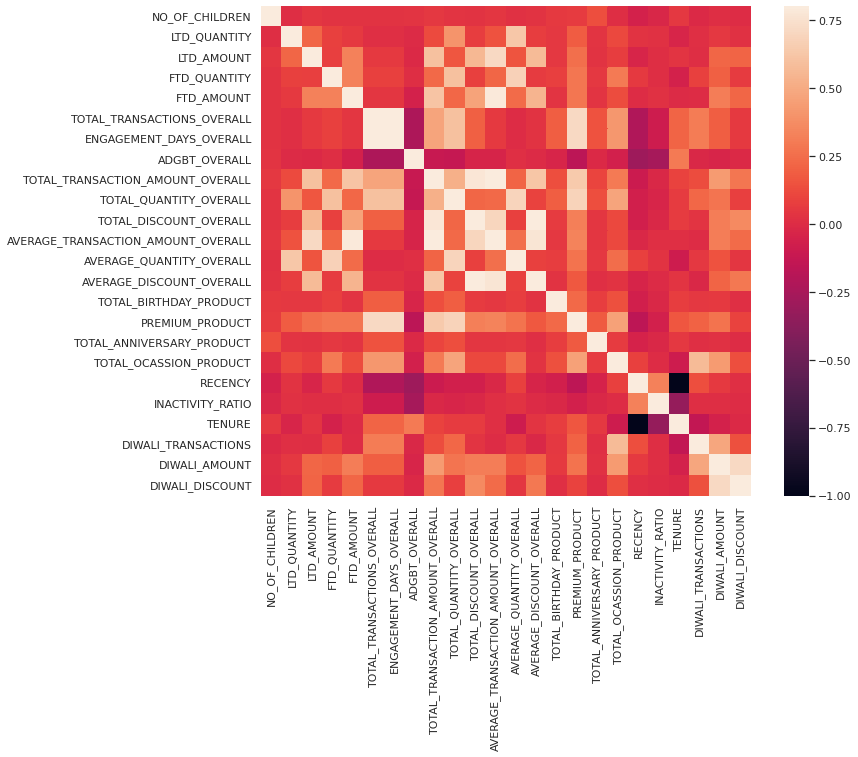

In [38]:
#correlation matrix
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Conclusion of Correlation Matrix:** 

1) By Looking at Correlation Matrix we can clearly look at that variables **Recency** and **Tenure** are negatively correlated to each other so we can drop one of them. (This has to be a problem in Dataset) as they cannot be each other's compliments 

2) **Inactivity_Ratio** and **ADGBT_Overall** also are correlated to each other in negative way

3) **Total_Transaction_Overall** and **Engagment_days_overall** are correlated to each other in positive way, We can expect this as one is distinct Bill date count and other is total count so a reatail customer will not buy to many thing in a single day which lends to same values in both columns

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)

There has to be clearly a problem in variables TENURE and RECENCY as there are perfectly mirrored values in them,
 we will drop Tenure from our data



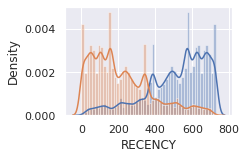

In [39]:
warnings.filterwarnings('ignore')
print(sns.distplot(raw_data['TENURE']))
print(sns.distplot(raw_data['RECENCY']))
print("\nThere has to be clearly a problem in variables TENURE and RECENCY as there are perfectly mirrored values in them,\n we will drop Tenure from our data\n")

In [40]:
#Dropping Correlated Variables
raw_data = raw_data.drop(['TENURE','INACTIVITY_RATIO','ENGAGEMENT_DAYS_OVERALL'],axis = 1)

### ***6.2 Categorical Variables EDA***

Categorical Variables are features which have only few categories in them to define the data point such as FAV_MONTH will only have 12 Categories from Jan to Dec

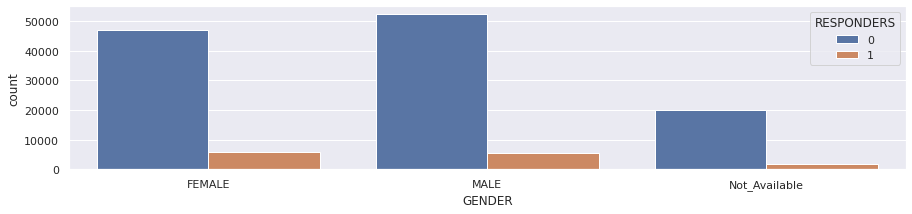

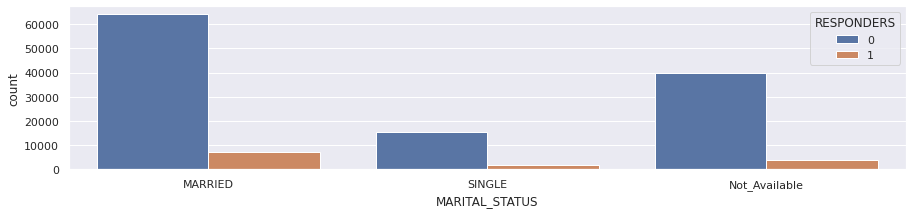

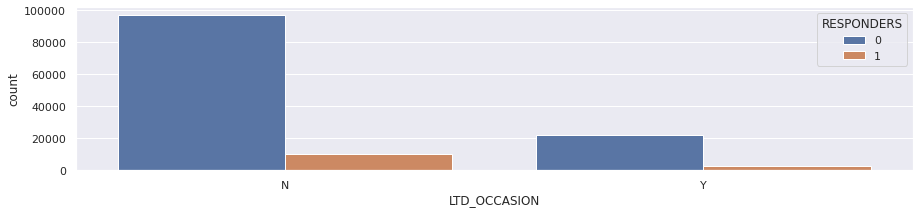

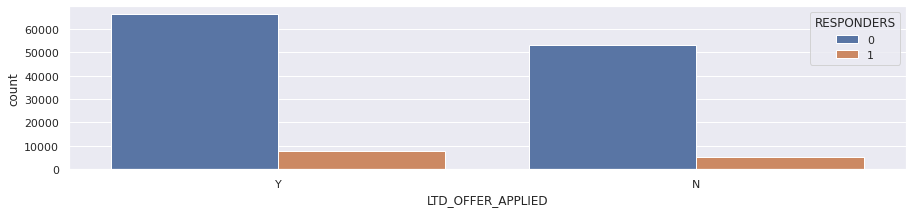

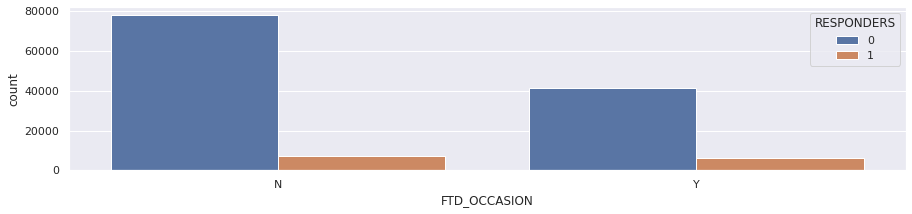

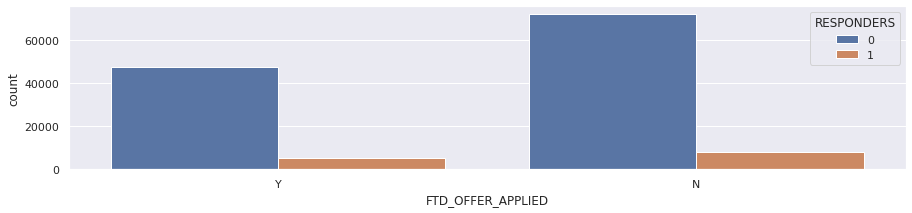

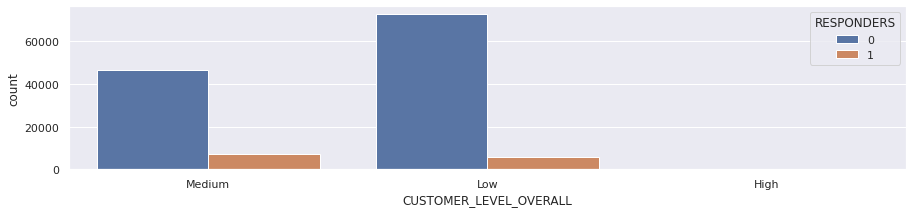

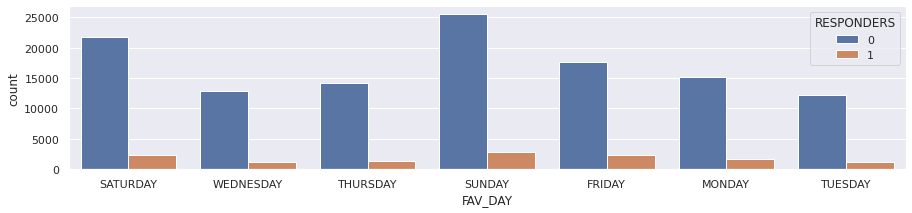

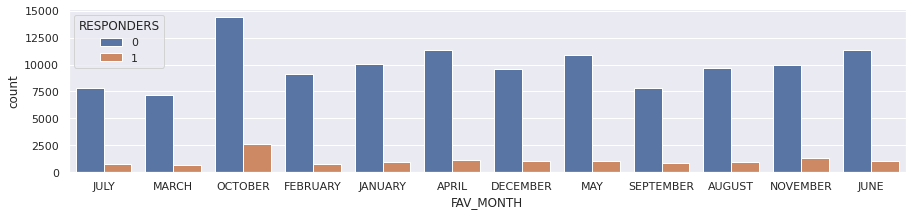

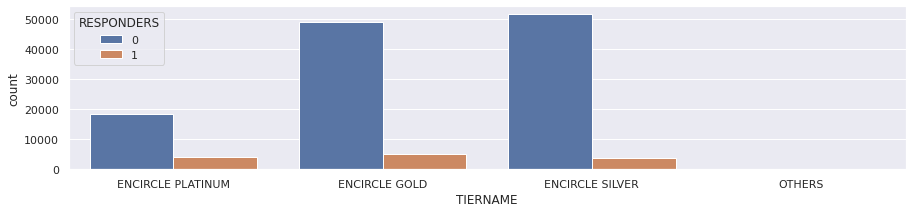

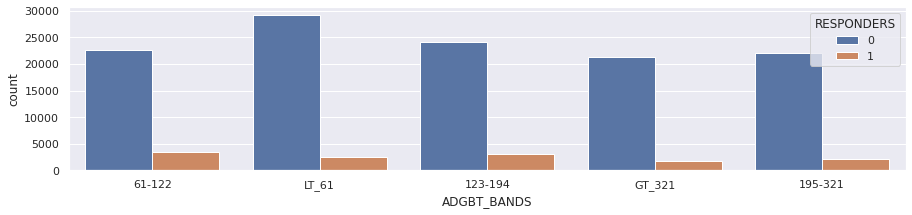

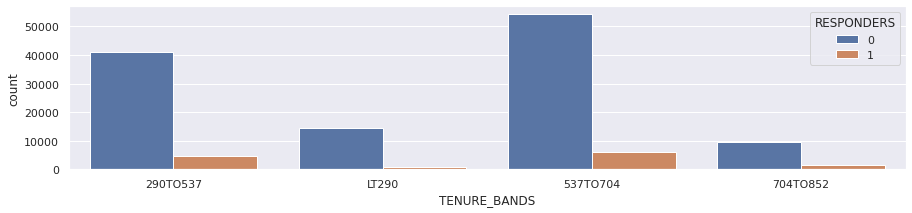

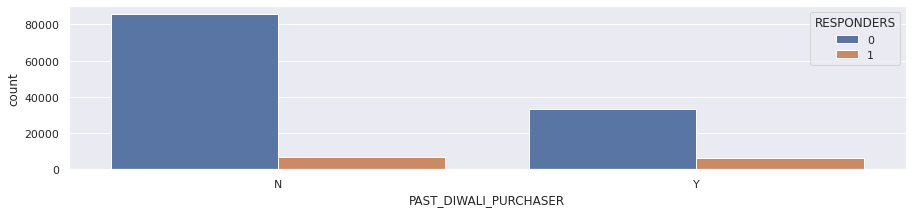

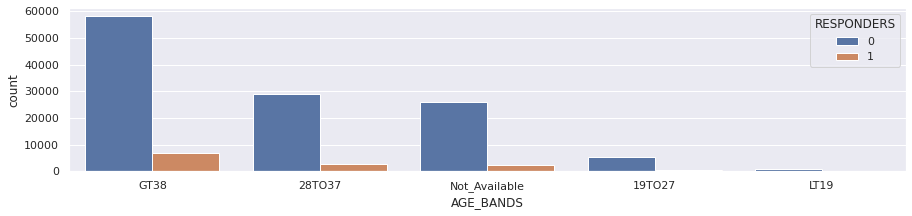

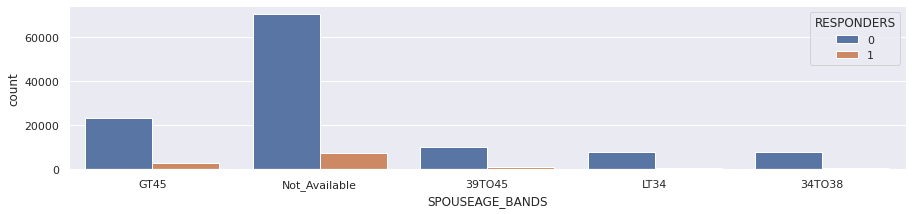

In [41]:
CAT_LIST = ['GENDER','MARITAL_STATUS','LTD_OCCASION','LTD_OFFER_APPLIED','FTD_OCCASION','FTD_OFFER_APPLIED','CUSTOMER_LEVEL_OVERALL',
 'FAV_DAY','FAV_MONTH','TIERNAME','ADGBT_BANDS','TENURE_BANDS','PAST_DIWALI_PURCHASER','AGE_BANDS','SPOUSEAGE_BANDS']
sns.set(rc = {'figure.figsize':(15,3)})
for i, col in enumerate(CAT_LIST):
    plt.figure(i)
    sns.countplot(raw_data[col],hue= Response)

**Conclusion from Categorical EDA:**

**1)** By looking at the gender graph More Females try to buy in Diwali period then Male, which also seems to be logically correct

**2)** The people who response in diwali are purchasers who have bought on weekends in past we can see thos by looking at FAV_DAY graph

**3)** Also a interesting aspect of our customers is that there is a peak in sales during october which is a diwali period, so in past also customers tend to buy in diwali only with the brand

**4)** Responders have an average days gap between their transactions ranging from 61-122, which usually tells us that people dont usually buy before 3-5 months of diwali.

**5)** 80% of people who have not bought in this diwali have also not bought in any past diwali where 20% of people who have not bought this diwali have bought last diwali. So customer do come to buy who have an experience on buying in diwali

Rest all variables do not really show any special characteristics to define

### ***6.3 Continuous Variable EDA***

---

Continuos Variables have integer valuews in it for example Age is an CV. This variables can be normally distributed or skewed towards any of the ends lets find out

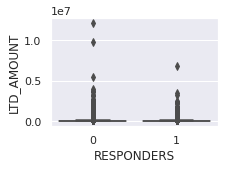

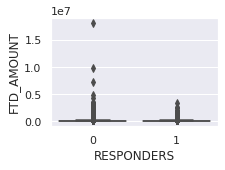

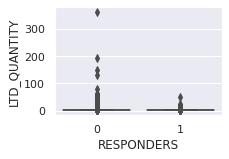

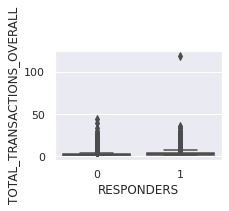

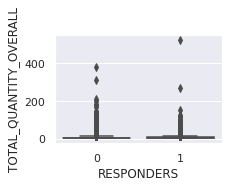

In [42]:
sns.set(rc = {'figure.figsize':(3,2)})
for i, col in enumerate(['LTD_AMOUNT','FTD_AMOUNT','LTD_QUANTITY','TOTAL_TRANSACTIONS_OVERALL','TOTAL_QUANTITY_OVERALL']):
    plt.figure(i)
    sns.boxplot(Response, y= col, data=raw_data)

We can see that some of the values are going out of the range of normal values which also gives us a hint on doing outlier treatment. Lets first check few more variable ranges by decribing them

In [43]:
raw_data.describe()

,NO_OF_CHILDREN,LTD_QUANTITY,LTD_AMOUNT,FTD_QUANTITY,FTD_AMOUNT,TOTAL_TRANSACTIONS_OVERALL,ADGBT_OVERALL,TOTAL_TRANSACTION_AMOUNT_OVERALL,TOTAL_QUANTITY_OVERALL,TOTAL_DISCOUNT_OVERALL,AVERAGE_TRANSACTION_AMOUNT_OVERALL,AVERAGE_QUANTITY_OVERALL,AVERAGE_DISCOUNT_OVERALL,TOTAL_BIRTHDAY_PRODUCT,PREMIUM_PRODUCT,TOTAL_ANNIVERSARY_PRODUCT,TOTAL_OCASSION_PRODUCT,RECENCY,DIWALI_TRANSACTIONS,DIWALI_AMOUNT,DIWALI_DISCOUNT
count,132414.000000,132414.000000,1.324140e+05,132414.000000,1.324140e+05,132414.000000,132414.000000,1.324140e+05,132414.000000,1.324140e+05,1.324140e+05,132414.000000,1.324140e+05,132414.000000,132414.000000,132414.000000,132414.000000,132414.000000,132414.000000,1.324140e+05,1.324140e+05
mean,0.468855,1.643391,7.612761e+04,2.053031,7.971605e+04,2.835236,174.024000,2.285534e+05,5.248380,1.227785e+04,7.742381e+04,1.574901,4.060967e+03,0.346285,3.451999,0.290989,1.275031,216.072387,0.381221,2.955372e+04,1.082477e+03
std,0.854434,1.905810,1.263664e+05,2.623471,1.392069e+05,1.576465,137.765609,3.601822e+05,5.643536,4.805924e+04,1.035697e+05,1.495733,1.554362e+04,0.983244,2.802637,0.899515,1.905459,166.806533,0.654993,1.107773e+05,1.425984e+04
min,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,2.000000,1.000000,6.000000e+02,2.000000,0.000000e+00,3.000000e+02,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,1.759275e+04,1.000000,1.685000e+04,2.000000,64.000000,6.275900e+04,3.000000,1.000000e+00,2.661500e+04,1.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,87.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,1.000000,3.914900e+04,1.000000,3.860500e+04,2.000000,145.000000,1.326665e+05,4.000000,2.260000e+03,5.139500e+04,1.000000,8.810000e+02,0.000000,3.000000,0.000000,1.000000,171.000000,0.000000,0.000000e+00,0.000000e+00
75%,1.000000,2.000000,9.202000e+04,2.000000,9.350325e+04,3.000000,265.000000,2.705652e+05,6.000000,8.333000e+03,9.620100e+04,2.000000,3.049000e+03,0.000000,4.000000,0.000000,2.000000,317.000000,1.000000,1.361600e+04,0.000000e+00
max,3.000000,363.000000,1.219862e+07,143.000000,1.814450e+07,119.000000,726.000000,3.034312e+07,524.000000,5.356603e+06,1.517156e+07,189.000000,1.785534e+06,32.000000,94.000000,27.000000,72.000000,728.000000,9.000000,1.091840e+07,2.572002e+06


Transactional Variables like LTD_QUANTITY,TOTAL_TRANSACTION OVERALL have values which are really not logical for an normal customer to act. Such as LTD_QUANTITY has 363 as a value, a normal customer will not but 363 quantites of product in any transactions this must be an outsourcing brand or just one time value. These are also called as outliers which deviate our data from normal distributions. So we should treat them

In [44]:
lTD_AMOUNT_EX = raw_data['LTD_AMOUNT']

#### ***6.3.1. Outlier Treatment***


---
 The data which is collected at companies will have outliers.

 Outliers are the data points which do not fall under normal range of that Column.

 We should do an Outlier treatment before building our model so that the model does not deviate from the actual data Points

We will be Using IQR (Inter quatile range) Outlier treatment for this data

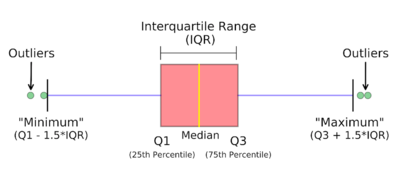


In [45]:
###outlier treatment
numerics =['int16','int32','int64','float16','float32','float64']
train_numeric =raw_data.select_dtypes(include=numerics)
vars_tobe_treated =list(train_numeric.columns)

for cols in vars_tobe_treated:
    Q1 =raw_data[cols].quantile(0.25)
    Q3=raw_data[cols].quantile(0.75)
    if(Q1 == Q3):
        raw_data[cols] =raw_data[cols]
    else:
        print('Outlier Treatment happening on: '+ cols)
        IQR= Q3-Q1
        Upper_Limit = Q3+1.5*IQR
        Lower_Limit = Q1-1.5*IQR
        raw_data[cols]=np.where(raw_data[cols] > Upper_Limit ,Upper_Limit,raw_data[cols])
        raw_data[cols]=np.where(raw_data[cols] < Lower_Limit ,Lower_Limit,raw_data[cols])

print("Outlier_Treatment_Done")


Outlier Treatment happening on: NO_OF_CHILDREN
Outlier Treatment happening on: LTD_QUANTITY
Outlier Treatment happening on: LTD_AMOUNT
Outlier Treatment happening on: FTD_QUANTITY
Outlier Treatment happening on: FTD_AMOUNT
Outlier Treatment happening on: TOTAL_TRANSACTIONS_OVERALL
Outlier Treatment happening on: ADGBT_OVERALL
Outlier Treatment happening on: TOTAL_TRANSACTION_AMOUNT_OVERALL
Outlier Treatment happening on: TOTAL_QUANTITY_OVERALL
Outlier Treatment happening on: TOTAL_DISCOUNT_OVERALL
Outlier Treatment happening on: AVERAGE_TRANSACTION_AMOUNT_OVERALL
Outlier Treatment happening on: AVERAGE_QUANTITY_OVERALL
Outlier Treatment happening on: AVERAGE_DISCOUNT_OVERALL
Outlier Treatment happening on: PREMIUM_PRODUCT
Outlier Treatment happening on: TOTAL_OCASSION_PRODUCT
Outlier Treatment happening on: RECENCY
Outlier Treatment happening on: DIWALI_TRANSACTIONS
Outlier Treatment happening on: DIWALI_AMOUNT
Outlier_Treatment_Done


Lets check range of LTD_AMOUNT after Outlier Treatment and compare it with before


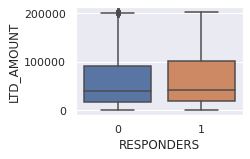

In [46]:
sns.boxplot(Response, y= 'LTD_AMOUNT', data=raw_data)

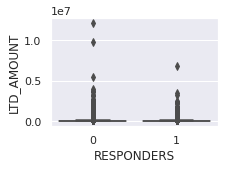

In [47]:
sns.boxplot(Response, y= lTD_AMOUNT_EX)

The above 2 Graphs shows us how Outlier Treatment handles values which are out of range so bravoo....

#### ***6.3.2 Histograms***

As now we are done with outliers we can check distributions of the variables in our raw data

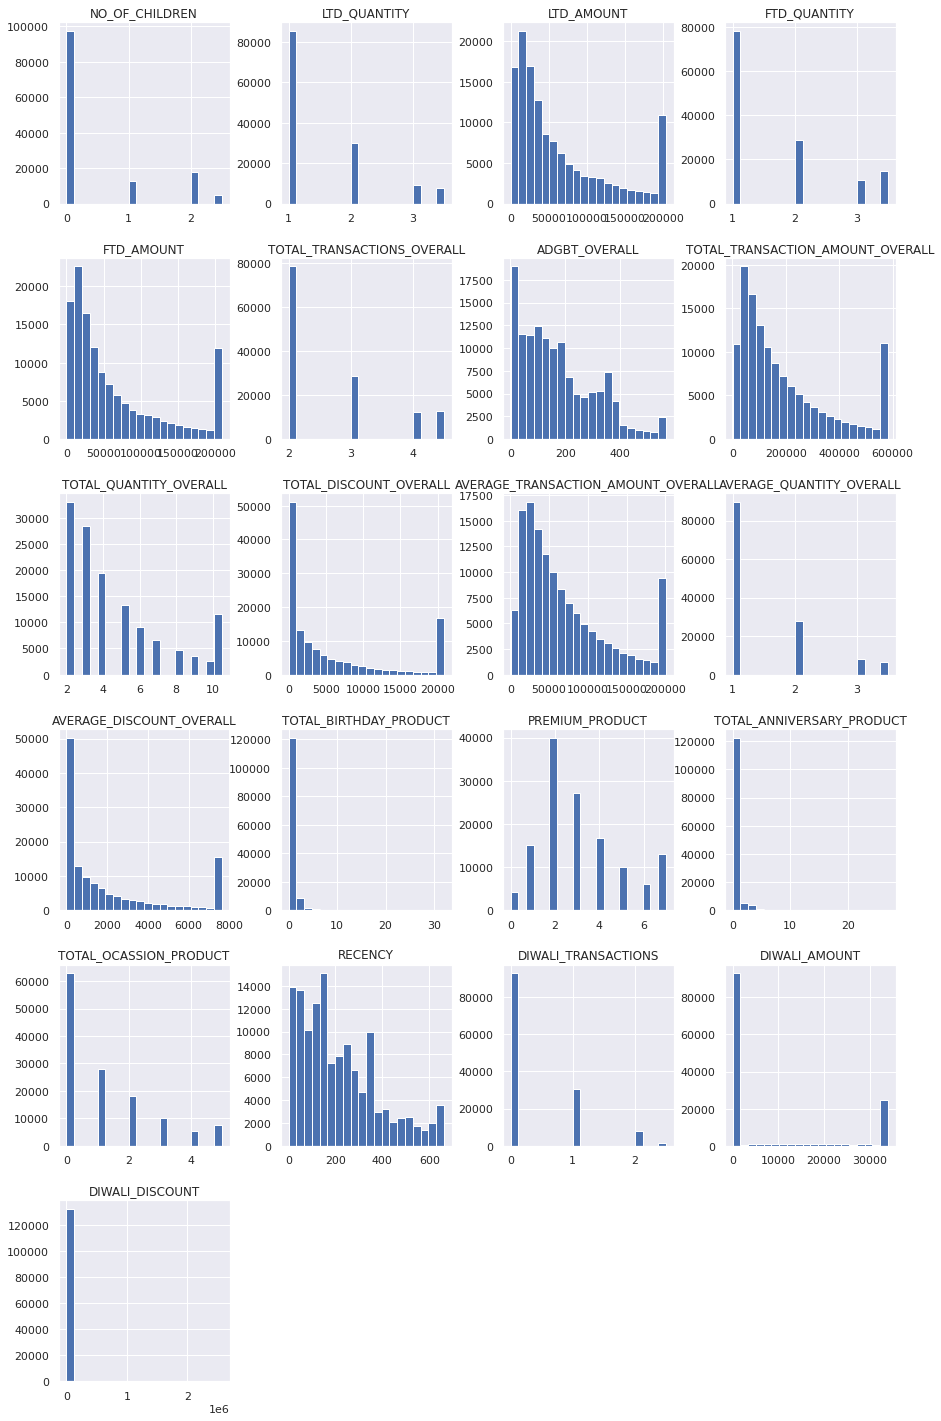

In [48]:
raw_data[vars_tobe_treated].hist(bins=20, figsize=(15, 25), layout=(6, 4));

***Conslusion from Continuos EDA***

1) The Features are not normally distributed, Majority of them are left skewed which is true in most retail datasets.

2) Premium product feature has a distributed curve

## ***8. Dummy Variable Creation***

At first to build a Model(Classification) We need to change our variables to dummies variables.

Dummy Variables helps in dividing the object variables to integer variable (1 or 0) which the Model function cn take

In [49]:
###creating dummies for model building#####
cols_to_keep = raw_data.columns.tolist()
def getFeatures(df , run_id, tuple_cols_toKeep):
    if(tuple_cols_toKeep is None):
        features = df
    else:
        features = pd.DataFrame(df, columns = tuple_cols_toKeep)
    features = pd.get_dummies(features,drop_first=True)
    return(features)
####calling the dummies function####
features_final = getFeatures(raw_data,'1020',cols_to_keep)
print("The Shape of Dummy Variables are:",features_final.shape)

The Shape of Dummy Variables are: (132414, 67)


## ***9. Train and Test Split***

We need to Test our Model. So the data which we have we will divide that into Train Set and Test Set.

**Train Set:** The Mathematical Function is Fitted on the Train Set that means the function learns the pattern from Train Set and stores it in the function.

**Test Set:** Once we are ready with the Function we need to test it on Test Data

In [50]:
##splitting the data into train and test###
print("creating_train_test_data")
train_features, test_features, train_labels, test_labels, train_labelkey, test_labelkey = train_test_split(features_final, 
                                                                                                            Response,Customer_ID, 
                                                                                                            test_size = 0.30,
                                                                                                            random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Training Label Key Shape:', train_labelkey.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Testing Label Key Shape:', test_labelkey.shape)


creating_train_test_data
Training Features Shape: (92689, 67)
Training Labels Shape: (92689,)
Training Label Key Shape: (92689,)
Testing Features Shape: (39725, 67)
Testing Labels Shape: (39725,)
Testing Label Key Shape: (39725,)


## ***10. Basic Model Build and Feature Importance***

Top 5 Features of the Train data are:
         imp                                 var
0  0.084597                       ADGBT_OVERALL
1  0.083708                          FTD_AMOUNT
2  0.083446                          LTD_AMOUNT
3  0.081640                             RECENCY
4  0.069424  AVERAGE_TRANSACTION_AMOUNT_OVERALL


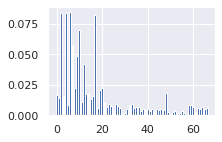

In [51]:
# © Code Copyright : https://machinelearningmastery.com/calculate-feature-importance-with-python/

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(train_features, train_labels)
# get importance
feature_importances_train = sorted(zip(model.feature_importances_, list(train_features)), reverse=True)
feature_importances_df_train = pd.DataFrame(feature_importances_train, columns=["imp", "var"])
print("Top 5 Features of the Train data are:\n",feature_importances_df_train.head(5))

# summarize feature importance
# plot feature importance
plt.bar([x for x in range(len(model.feature_importances_))], model.feature_importances_)
plt.show()



In [52]:
print("Bottom 5 Variables of the Train data are:\n",feature_importances_df_train.tail(5))

Bottom 5 Variables of the Train data are:
          imp                         var
62  0.001642       TENURE_BANDS_704TO852
63  0.001119          ADGBT_BANDS_GT_321
64  0.000805  CUSTOMER_LEVEL_OVERALL_Low
65  0.000413          TENURE_BANDS_LT290
66  0.000000             TIERNAME_OTHERS


## ***11. Testing Train and Test data are Similar***

P.S: We have used split function to divide the data into test and train so it takes care of dividing the data in proper distribution. But still lets make sure of that.

Covariate shift refers to a situation where predictor variables have different characteristics (distribution) in train and test data.

**1) To identify this we will train our Decision Trees on both test and train datasets**

**2) We will check the feature importance of both dataset and subtract the importance value**

**3) If the final Covariate value is very small then there is not Shift in the data**

In [53]:
model.fit(test_features, test_labels)
# get importance
feature_importances_test = sorted(zip(model.feature_importances_, list(test_features)), reverse=True)
feature_importances_df_test = pd.DataFrame(feature_importances_test, columns=["imp", "var"])
print("Top 5 Features of the Test data are:\n",feature_importances_df_test.head(5))
print("\nLossely as both the TOP 5 variables are similar we can assume that train and test dataset have same distribution")

Top 5 Features of the Test data are:
         imp                                 var
0  0.079603                             RECENCY
1  0.078275                          FTD_AMOUNT
2  0.078233  AVERAGE_TRANSACTION_AMOUNT_OVERALL
3  0.076449                       ADGBT_OVERALL
4  0.075128                          LTD_AMOUNT

Lossely as both the TOP 5 variables are similar we can assume that train and test dataset have same distribution


## ***12. Conclusion***

---

1) In this Notebook we saw what to check in the data and how to visualize it

2)We saw distributions of the variables

3) Check correlation which gave us that few predictors are same as other predictors

4) We saw some methods of mising value treatments and outlier detection method which are important for the model

5) We saw how to handle categorical features by creating dummies of them

6) We did feature importance with Decision Tree Classifier and plotted

7) Finally we checked wether the train and test data were splitted correctly which thet did

## ***13. References***
Begin license text.
Copyright 2021 Parth Bipin Shah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [55]:
%%html
<marquee style='width: 90%; color: red;'><b> **** END OF THE NOTEBOOK **** </b></marquee>